In [22]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

def arrow_xy(action, prob):
    ## Position change given action:
    if(action == 0): # move right
        a_out = [1.0,0.0]
    elif(action == 1): # move right-up
        a_out = [0.707,0.707]
    elif(action == 2): # move up
        a_out = [0.0,1.0]
    elif(action == 3): # move left-up
        a_out = [-0.707,0.707]
    elif(action == 4): # move left
        a_out = [-1.0,0]
    elif(action == 5): # move left-down
        a_out = [-0.707,-0.707]
    elif(action == 6): # move down
        a_out = [0.0,-1.0]
    elif(action == 7): # move right-down
        a_out = [0.707,-0.707]
    return [prob*z for z in a_out]

def display_policy(policy, num_cells = 10, lims = 10.0):
    '''
    Funciton plots arrows in the direction of actions with length 
    of arrows proportional to probability

    Policy argument must be a numpy array with dimensions:
    grid x-dimension cell index
    grid y-dimension cell index
    acton index
    '''
    ## Find max arrow length 
    cell_width = lims/float(num_cells)
    arrow_length = 0.5 * cell_width

    ## Set up the figure area
    fig = plt.figure(figsize=(8, 8)) # define plot area
    ax = fig.gca() # define axis 

    ## Iterate over the grid and plot
    for x_indx, y_indx, action in product(range(num_cells),range(num_cells),range(8)):
        ## Find endpoints of the line segment
        move = arrow_xy(action, policy[x_indx,y_indx,action])
        x0 = x_indx * cell_width + arrow_length
        x1 = x0 + move[0]
        y0 = y_indx * cell_width + arrow_length
        y1 = y0 + move[1]
        ## now plot 
        # ax.plot([x0,x1],[y0,y1])
        ax.annotate(' ', xytext =(x0,y0), xy = (x1,y1), arrowprops = ({'arrowstyle':'->'}))

    ## Now plot the grid
    ## first the vertical lines
    for indx in range(num_cells-1):
        x = cell_width *(indx+1)
        ax.plot([x,x],[0.0,lims], linestyle='dashed', color='green')
    ## now the horrizontal lines
    for indx in range(num_cells-1):
        y = cell_width *(indx+1)
        ax.plot([0.0,lims],[y,y], linestyle='dashed', color='green') 
    ## and boundaries
    ax.plot([0.0,0.0], [0.0,lims], color = 'black')
    ax.plot([0.0,lims], [0.0,0.0], color = 'black')
    ax.plot([lims,0.0], [lims,lims], color = 'black')
    ax.plot([lims,lims], [0.0,lims], color = 'black')

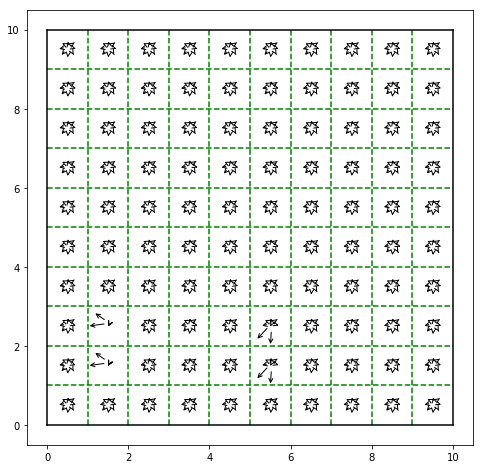

In [42]:
initial_policy = 0.25 * np.ones((16,16,8))
initial_policy[1, 1:3, :] = 0
initial_policy[1, 1:3, 3:5] = .5
initial_policy[15, 15, :] = 0
initial_policy[15, 15, 2:5] = .3333
initial_policy[5, 1:3, 5:] = 0
initial_policy[5, 1:3, 5:7] = .5
    
display_policy(initial_policy)